In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests # API

In [2]:
# api_url = "https://openexchangerates.org/api/latest.json?app_id=YOUR_API_KEY" your api key에 본인 api 붙여넣기
api_url = "https://openexchangerates.org/api/latest.json?app_id=eb996b3615aa4840962f6b53bbd49d76"


response = requests.get(api_url)
data = response.json()

In [3]:
eur_rate = data["rates"]["EUR"]

In [4]:
eur_rate # 기본적으로 다 $1 per 환율

0.919836

In [5]:
krw_rate = data["rates"]["KRW"]
krw_rate

1370.01

In [6]:
jpy_rate = data["rates"]["JPY"]
jpy_rate

149.535

In [7]:
# KRW 기준으로 환율 변환
usd_to_krw = data["rates"]["KRW"]
krw_rates = {}
for currency, usd_rate in data["rates"].items() :
  if currency != "KRW" :
    krw_rates[currency] = usd_rate / usd_to_krw

In [8]:
for currency, rate in krw_rates.items() :
  print(f"KRW to {currency} : {rate}") # f는 replacement field

KRW to AED : 0.0026810023284501573
KRW to AFN : 0.04780987292063562
KRW to ALL : 0.06634988065780542
KRW to AMD : 0.28266217034912156
KRW to ANG : 0.0013156079152706916
KRW to AOA : 0.6660535324559674
KRW to ARS : 0.7137972204582448
KRW to AUD : 0.0010878117677973153
KRW to AWG : 0.00131385902292684
KRW to AZN : 0.0012408668549864599
KRW to BAM : 0.0013164830913642966
KRW to BBD : 0.0014598433588076
KRW to BDT : 0.08723600849628835
KRW to BGN : 0.0013135086605207261
KRW to BHD : 0.0002751593054065299
KRW to BIF : 2.1112984576754914
KRW to BMD : 0.0007299216794038
KRW to BND : 0.0009580477514762666
KRW to BOB : 0.005044341282180422
KRW to BRL : 0.004155298136509953
KRW to BSD : 0.0007299216794038
KRW to BTC : 1.0673992890562843e-08
KRW to BTN : 0.061368104612375095
KRW to BWP : 0.00973327639944234
KRW to BYN : 0.002388960664520697
KRW to BZD : 0.0014714345150765324
KRW to CAD : 0.0010082043196764988
KRW to CDF : 2.0773570995832147
KRW to CHF : 0.0006314333472018452
KRW to CLF : 2.496186

In [9]:
usd_to_krw = data["rates"]["KRW"]

amount_in_krw = 1000000 # 변환할 금액 : 100만원
conversion_results = {}

krw_rates = {}
for currency, usd_rate in data["rates"].items() :
  if currency != "KRW" :
    krw_rates[currency] = usd_rate / usd_to_krw
    converted_amount = amount_in_krw * rate
    conversion_results[currency] = converted_amount

for currency, converted_amount in conversion_results.items() :
  print(f"1 million KRW to {currency} : {converted_amount}")

1 million KRW to AED : 235034.7807680236
1 million KRW to AFN : 235034.7807680236
1 million KRW to ALL : 235034.7807680236
1 million KRW to AMD : 235034.7807680236
1 million KRW to ANG : 235034.7807680236
1 million KRW to AOA : 235034.7807680236
1 million KRW to ARS : 235034.7807680236
1 million KRW to AUD : 235034.7807680236
1 million KRW to AWG : 235034.7807680236
1 million KRW to AZN : 235034.7807680236
1 million KRW to BAM : 235034.7807680236
1 million KRW to BBD : 235034.7807680236
1 million KRW to BDT : 235034.7807680236
1 million KRW to BGN : 235034.7807680236
1 million KRW to BHD : 235034.7807680236
1 million KRW to BIF : 235034.7807680236
1 million KRW to BMD : 235034.7807680236
1 million KRW to BND : 235034.7807680236
1 million KRW to BOB : 235034.7807680236
1 million KRW to BRL : 235034.7807680236
1 million KRW to BSD : 235034.7807680236
1 million KRW to BTC : 235034.7807680236
1 million KRW to BTN : 235034.7807680236
1 million KRW to BWP : 235034.7807680236
1 million KRW to

시간차 - time lag


time series 시계열데이터 볼것임
cross section과 분석방법이 다르다

# 시계열, Time Series

- A sequence of observations recorded as at a regular time intervals

- Hourly, Weekly, Monthly, Quarterly, Annually

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [11]:
uploaded = files.upload()

Saving time_series.csv to time_series.csv


In [12]:
df = pd.read_csv("time_series.csv")
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [13]:
df.info() # 데이터 정보 Datatype은 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [14]:
df # 204개의 달 정도의 데이터 그 중에 missing value 있나..

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [15]:
# date 변수를 날짜형으로 선언
df["date"] = pd.to_datetime(df["date"])

In [16]:
df.info() # dtype이 object에서 datetime으로 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


In [17]:
df.set_index("date", inplace = True) # 날짜를 인덱스로 선언! 그럼 원래 default로 있던거 빠짐

In [18]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [19]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

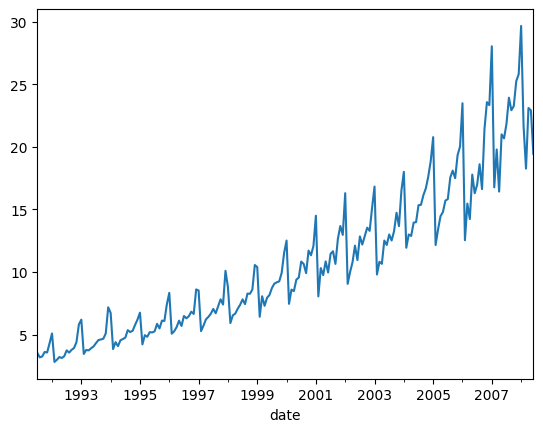

In [20]:
df["value"].plot()
plt.show()

In [21]:
# times series는 계절성seasonality가 중요하다

In [22]:
# 인덱스 리셋
df.reset_index(inplace = True)
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


d.date

equivalent to

??

In [23]:
df["year"] = [d.year for d in df.date]
df

,date,value,year
0,1991-07-01,3.526591,1991
1,1991-08-01,3.180891,1991
2,1991-09-01,3.252221,1991
3,1991-10-01,3.611003,1991
4,1991-11-01,3.565869,1991
...,...,...,...
199,2008-02-01,21.654285,2008
200,2008-03-01,18.264945,2008
201,2008-04-01,23.107677,2008
202,2008-05-01,22.912510,2008


In [24]:
df["month"] = [d.strftime("%b") for d in df.date]
df

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [25]:
import datetime
now = datetime.datetime.now()
print(now)

2024-10-20 09:29:54.991214


In [26]:
now_str = now.strftime("%Y년 %m월 %d일 %H시 %M분 %S초") # &b는 Oct로 나옴, 대소문자 다름, Y는 4자리 연-소문자는 뒤 두자리
print(now_str)

2024년 10월 20일 09시 29분 54초


계절성 - 달month끼리 묶거나 연도year끼리 묶어서 분석

In [27]:
df # year와 month

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
...,...,...,...,...
199,2008-02-01,21.654285,2008,Feb
200,2008-03-01,18.264945,2008,Mar
201,2008-04-01,23.107677,2008,Apr
202,2008-05-01,22.912510,2008,May


In [28]:
df["year"].unique() # 다 있는지 확인

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [29]:
df["month"].unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

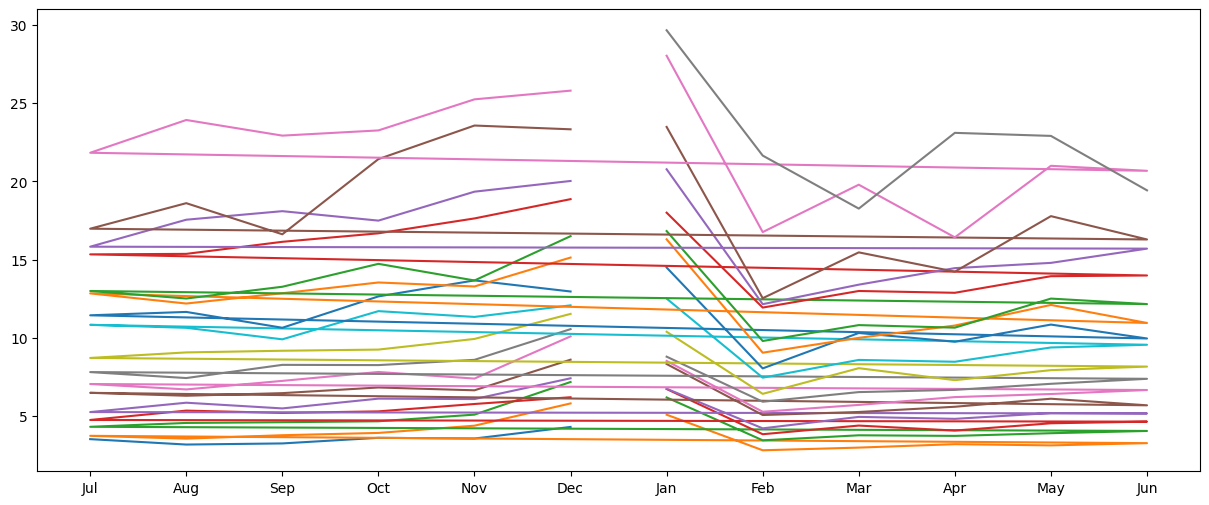

In [30]:
years = df["year"].unique()
plt.figure(figsize = (15, 6))
for i, y in enumerate(years) :
  plt.plot("month", "value", data = df.loc[df["year"] == y], label = y)
#plt.legend()

# 7월부터 시작하는건 원 자료가 7월부터 시작
# 91년부터 12개월 missing data가 있다 그래서 뚝뚝 끊기는게 있음

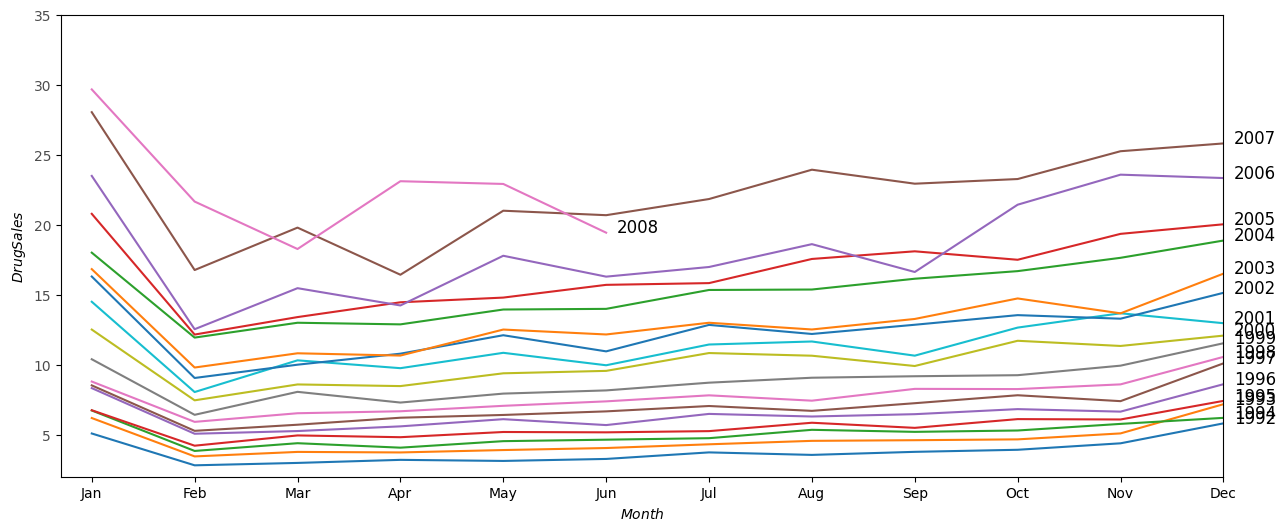

In [31]:
import matplotlib as mpl

# Prep Colors
np.random.seed(100)

# Draw Plot
plt.figure(figsize = (15, 6))

for i, y in enumerate(years):
  if i > 0: # 1991년은 7월부터 시작하게 되어서 jul 부터 시작하게 되어 누락함
    plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 35), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=10, alpha=.7)

plt.show()
# 월별 특정 패턴이 보인다
# 2월에 하락해서 상승하는 추세
# 2008년 데이터 loss

<Axes: xlabel='month', ylabel='value'>

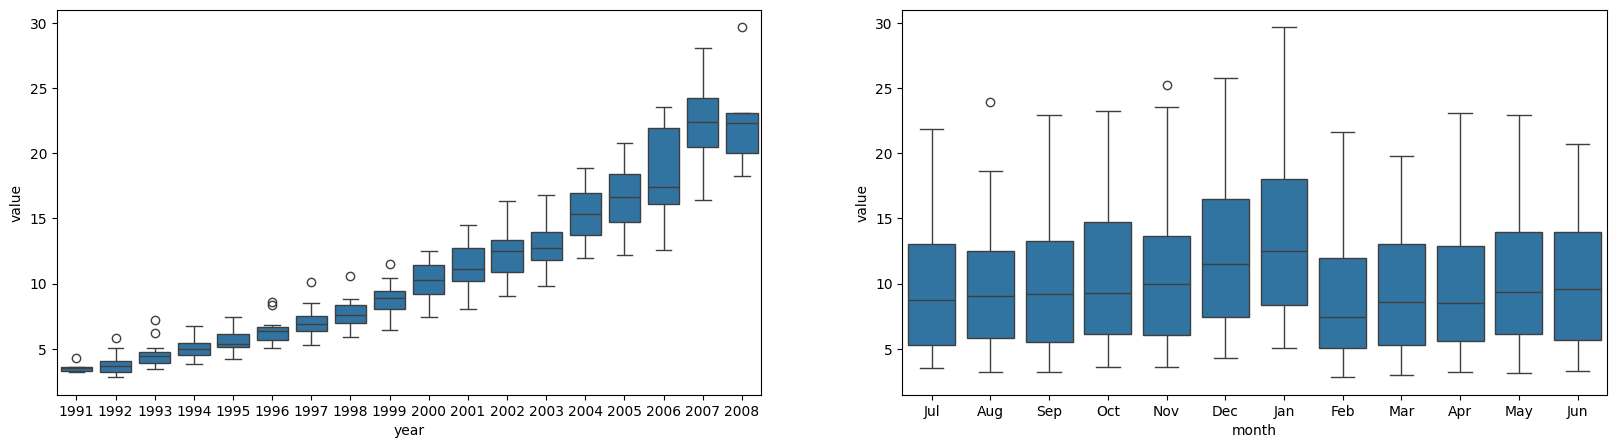

In [32]:
# monthly box plot
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
# yearly
sns.boxplot(x = "year", y = "value", data = df, ax = ax[0])
#monthly
sns.boxplot(x = "month", y = "value", data = df, ax = ax[1])

# 91년 boxplot is narrow - generally peak in january but starts in july
# 2008년 또한 소실이 있기에 분석에서 제외하는 것이 좋다
# 상승하는 패턴(연도별로 보면)
# outliar 제외

# monthly jan 이후 폭락